
# INTRODUCTION

The dataset for this analysis is Diabetes Prediction Dataset. This data set contains 100,000 entries with 9 columns, which include gender, age, heart_disease, smoking history, and many others. This dataset seek to analyse the factors inherent in the dataset, thereof generate a predictive model for medical purposes.

## Preliminary Wrangling

In [1]:
# Import the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




In [2]:
#load dataset

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# The number of Column and Rows

df.shape

(100000, 9)

### The dataset consist of 100,000 rows and 9 columns

In [4]:
# Check column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# cahnge age to int

df.age = df.age.astype(int)

In [6]:
# Check for null values

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

###  No missing values in the dataset

In [7]:
# Checkout ramdom samples

df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
16014,Male,80,0,0,No Info,27.32,4.8,200,0
95298,Female,54,0,0,No Info,27.32,6.2,158,0
54284,Female,30,0,0,No Info,19.65,4.5,80,0
22759,Male,63,0,1,ever,23.42,6.1,90,0
93113,Male,7,0,0,No Info,27.32,6.1,145,0
75669,Female,80,0,0,No Info,18.29,4.5,100,0
92270,Male,42,0,0,never,22.88,6.5,155,0
52643,Female,18,0,0,never,28.26,5.7,145,0
61724,Male,16,0,0,No Info,27.32,4.0,155,0
37967,Male,8,0,0,No Info,18.58,4.0,160,0


In [8]:
# Check for Duplicate

df.duplicated().sum()

3888

### There are 3854 duplicated values in the dataset

In [9]:
# Drop Duplicates

df.drop_duplicates(inplace=True)

In [10]:
df.shape

(96112, 9)

## Exploratory Data Analysis

In [11]:
# Check summary Statistic
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
# Define a function to plot a Countplot

def countplot(arg1, arg2, Heading):
    """arg1: pass in the dataframe
        arg2: pass in the x axis
        Heading: pass in a title
    """
    sns.countplot(data=arg1, x=arg2)
    plt.title(Heading)


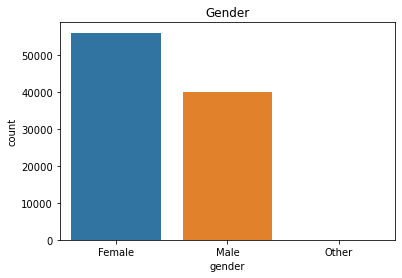

In [13]:
countplot(df,df.gender, "Gender")

In [14]:
# Count the number of "Other"

count = 0

for i in df.gender:
    if i =="Other":
        count+=1
print(count)


18


In [15]:
# drop "Other" roles in gender

df = df[df['gender'] != "Other"]

In [16]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

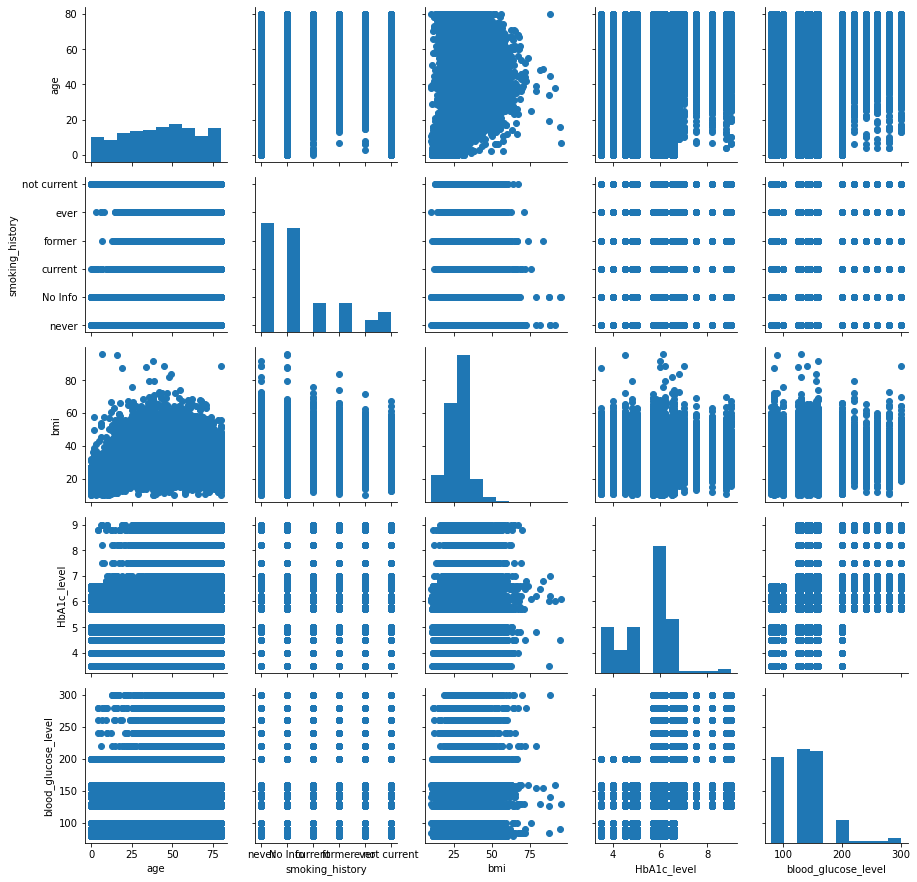

In [17]:
#Pairgrid on five numerical variable

g = sns.PairGrid(data = df, vars = ["age", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level",]) 
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### The above graphs depict lack of significant relationship between any of the variables

In [18]:
# def function for Dist plot

def Distplot(arg1, arg2, Heading):
    """arg1: pass in the dataframe
        arg2: pass in the x axis
        Heading: pass in a title
    """
    # Create a figure with two subplots: one for the histogram, one for the box plot
    fig, axs = plt.subplots(1, 2, figsize=(15,4))
    
    #Histgram Plot
    sns.histplot(data=arg1, x=arg2, kde=True, ax=axs[0], hue= "diabetes")
    axs[0].set_title(f"{Heading} - Histogram")
    axs[0].set_xlabel(arg2)
    axs[0].set_ylabel("Frequency")
    
    # Box Plot
    sns.scatterplot(data=arg1, x=arg2, y='HbA1c_level', hue="diabetes", ax=axs[1])
    axs[1].set_title(f"{Heading} - Lineplot")
    axs[1].set_xlabel(arg2)
    axs[1].set_ylabel("HbA1c_level")
    # Adjust layout
    plt.tight_layout()
    plt.show()

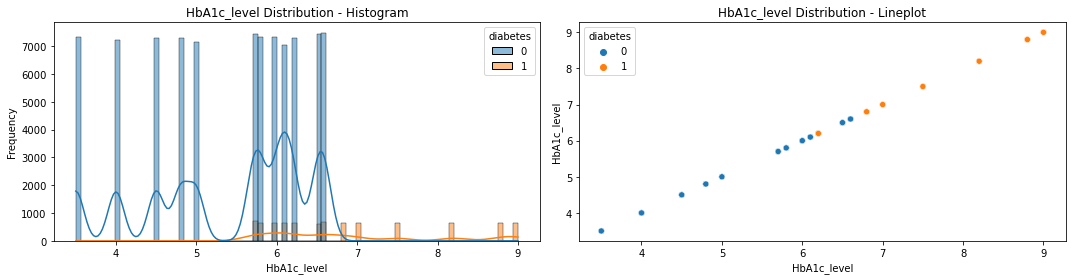

In [19]:
# Plot HbA1c_level distribution

Distplot(df, "HbA1c_level", "HbA1c_level Distribution")

### The above show that diabetes is more obvious with higher HbAIC level, therefore the higher the HbAIC level the more likely it is to be diabetic

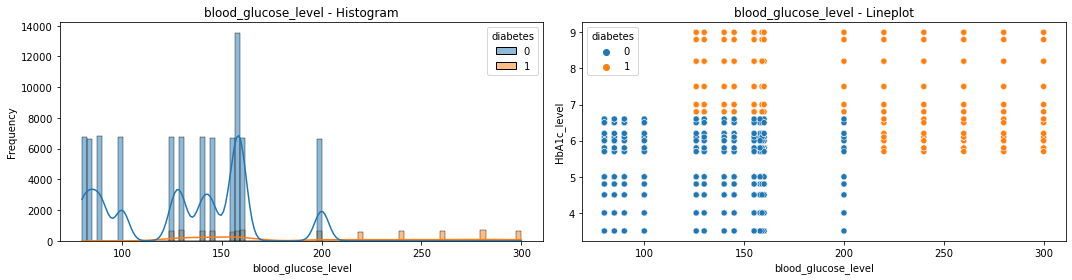

In [20]:
Distplot(df, "blood_glucose_level", "blood_glucose_level")

### The above show that diabetes is more obvious with higher blood glucose level, therefore the higher the HbAIC level the more likely it is to be diabetic


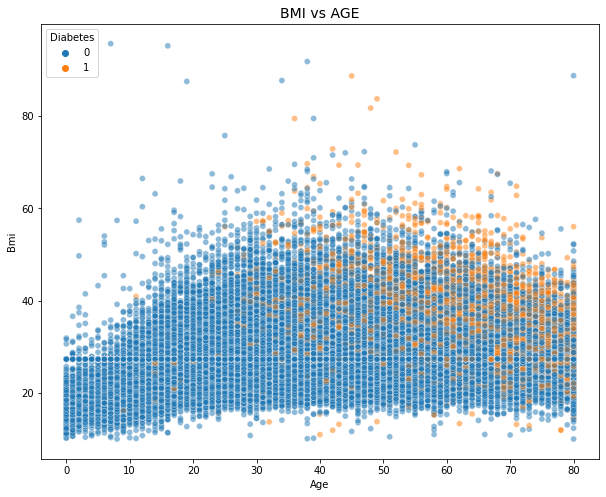

In [21]:
# Scatter plot: BMI vs Blood Glucose Level
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes', alpha=0.5)
plt.title('BMI vs AGE', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.legend(title='Diabetes')
plt.show()

### Even though Bmi does not significantly correlate with age, the chart above does signify that diabetics becomes more prevalent as age progresses

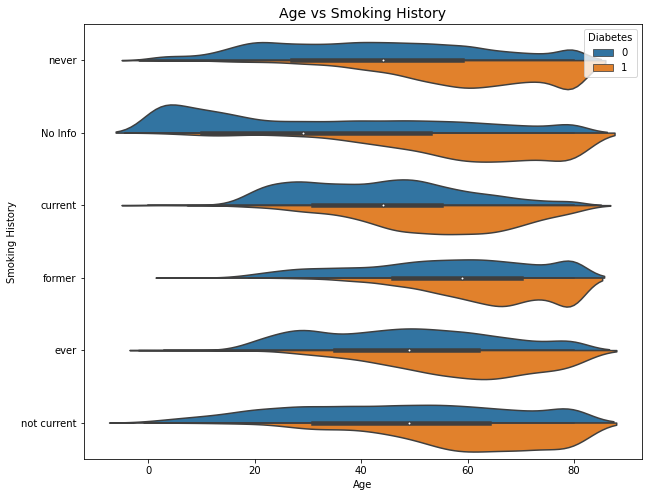

In [22]:
# Scatter plot: BMI vs Blood Glucose Level
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='age', y='smoking_history', hue='diabetes', split=True)
plt.title('Age vs Smoking History', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Smoking History')
plt.legend(title='Diabetes')
plt.show()

### The violin plot above shows the effect between age and smoking history on diabetics results. The above depicts that even though progressing age could indicate risk of diabetics, the same could not be said for smoking history of samples, as it shows that former smokers are more likely to be diabetic

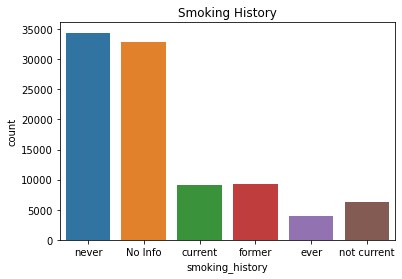

In [23]:
# plot the categories of Smoking History

countplot(df,df.smoking_history, "Smoking History")

### It appears that the category of "No info" has so many entries, let take a deeper dive.

In [24]:
# Count the number of "No info" in smoking history column

count = 0

for i in df.smoking_history:
    if i == "No Info":
        count += 1
print(count)

32847


#### The above shows that there are 32343 entries of "No Info" in smoking_history

In [25]:
# Replace "No Info" with NaN

df.smoking_history = df.smoking_history.replace("No Info", np.nan)

df.smoking_history.value_counts()

never          34395
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [26]:
df.smoking_history = df.smoking_history.fillna(df.smoking_history.mode()[0])

### It appears that "former", "not current", "ever" are the same because they mean the same thing, therefore they will be merged together


In [27]:
# merge "not current" to be "former"

df.smoking_history = df.smoking_history.replace("not current", "former")
df.smoking_history = df.smoking_history.replace("ever", "former")

In [28]:
df.smoking_history.value_counts()

never      67242
former     19655
current     9197
Name: smoking_history, dtype: int64

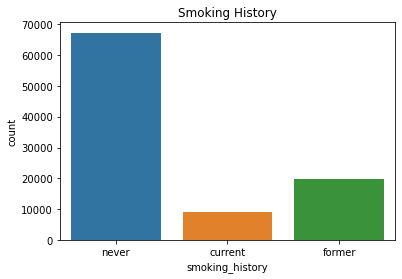

In [29]:
countplot(df,df.smoking_history, "Smoking History")

### The above shows the four categories
    Never = never smoked
    current = currently smokes
    Former = Past Smoker
   
   
    

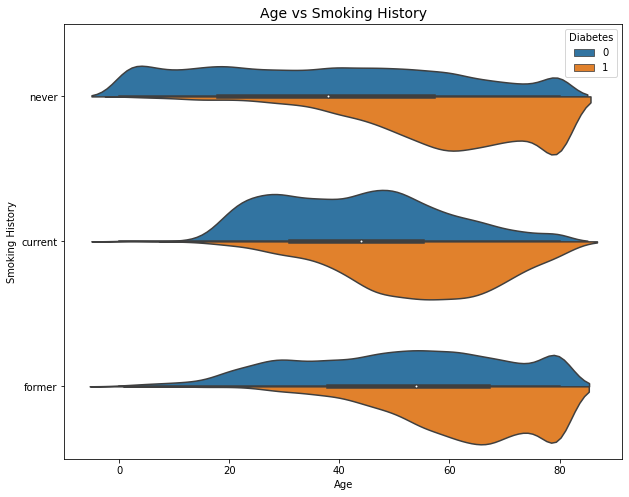

In [30]:
# Scatter plot: BMI vs Blood Glucose Level
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='age', y='smoking_history', hue='diabetes', split=True)
plt.title('Age vs Smoking History', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Smoking History')
plt.legend(title='Diabetes')
plt.show()

### The above graph indicate that age is a more determinant factor on the diabetics than smoking history, beacuase people who have never smoked before are as diabetic as people who are current and past smokers

In [31]:
# find rows where age 5 or below are smokers
mask = df[(df["age"] <= 8) & (df["smoking_history"].isin(["current", "former"]))]

# Drop the rows where the condition is true
df.drop(index=mask.index, inplace=True)

<AxesSubplot:xlabel='smoking_history', ylabel='age'>

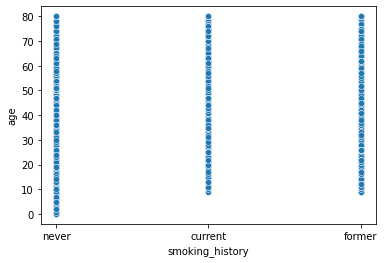

In [32]:

sns.scatterplot(data=df, x='smoking_history', y='age')

### Rows where age is 8years or below with smoking history of "former" and "current" have been dropped

In [33]:
# A sample data of 10 random rows
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
13578,Male,79,0,1,never,27.82,5.0,155,0
38596,Female,65,0,0,never,27.32,5.7,159,0
58159,Male,31,0,0,former,48.46,3.5,140,0
88411,Female,31,0,0,never,25.66,5.0,159,0
41721,Male,6,0,0,never,14.34,4.8,80,0
96531,Female,45,0,0,never,27.32,6.0,145,0
80042,Male,20,0,0,never,21.47,4.8,130,0
63609,Female,22,0,0,never,30.21,6.5,140,0
21076,Female,50,0,0,never,33.28,6.2,100,0
19721,Female,49,0,0,former,33.33,5.7,100,0


In [34]:
# Encoding the categorical column to numerical values

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

### There is no significant relationship evident between the above numerical variables

## Model Building

In [35]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,2,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,0,23.45,5.0,155,0
4,1,76,1,1,0,20.14,4.8,155,0


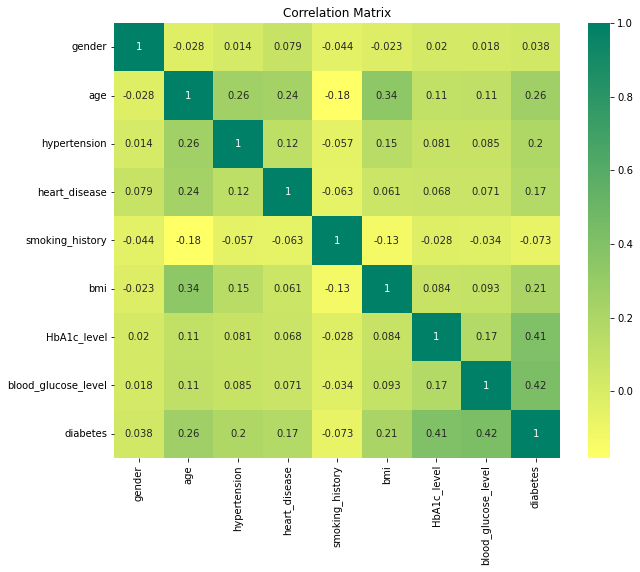

In [36]:
# Generate a correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='summer_r', annot =True)
plt.title("Correlation Matrix");

In [37]:
# develop Train dataset and target variable

X = df.drop(columns= "diabetes")
y = df.diabetes


In [38]:
# separate trainig set from test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Build RandomForestClassifer Model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')

# Fit training set
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [40]:
pred_Rf = rf_model.predict(X_test)

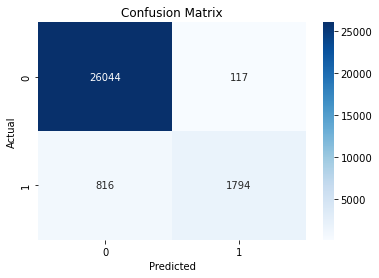

In [41]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_Rf)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# # Generate the classification report
report = classification_report(y_test, pred_Rf)


val_accuracy = accuracy_score(y_test, pred_Rf)
# Print the report
print(f"Validation Accuracy:", val_accuracy)
print(report)

Validation Accuracy: 0.967571512981822
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26161
           1       0.94      0.69      0.79      2610

    accuracy                           0.97     28771
   macro avg       0.95      0.84      0.89     28771
weighted avg       0.97      0.97      0.97     28771



# Summary of Findings

### Accuracy
    The overall accuracy of approximately 96.76%
    
### Precision
    Class 0 Precision (Non-Diabetic): At 0.97, this means that when the model predicts a patient as non-diabetic, it is correct 97% of the time.
    Class 1 Precision (Diabetic): At 0.94, this indicates that when the model predicts a patient as diabetic, it is correct 94% of the time.
### Recall
    Class 0 Recall: A perfect recall of 1.00 means that all actual non-diabetic patients were correctly identified by the model.
    Class 1 Recall: At 0.69, this indicates that only about 69% of actual diabetic patients are correctly identified by the model.    